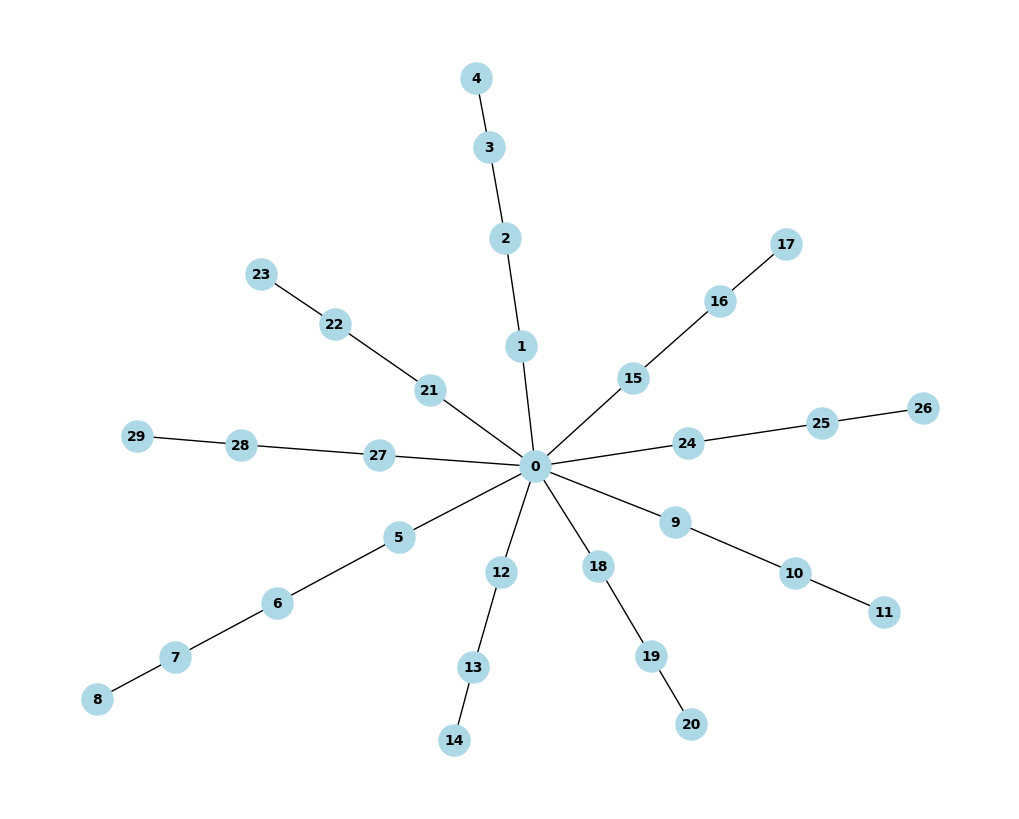

节点数: 30
边数: 29
度分布: {0: 9, 1: 2, 2: 2, 3: 2, 4: 1, 5: 2, 6: 2, 7: 2, 8: 1, 9: 2, 10: 2, 11: 1, 12: 2, 13: 2, 14: 1, 15: 2, 16: 2, 17: 1, 18: 2, 19: 2, 20: 1, 21: 2, 22: 2, 23: 1, 24: 2, 25: 2, 26: 1, 27: 2, 28: 2, 29: 1}


In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def create_jellyfish_graph(n, tentacle_lengths=None):
    """
    创建水母图

    参数:
    n: 总节点数
    tentacle_lengths: 触手长度列表，如果不指定则自动分配
    """
    G = nx.Graph()

    # 添加中心节点
    G.add_node(0)

    # 计算可用节点数（减去中心节点）
    available_nodes = n - 1

    # 如果没有指定触手长度，自动分配
    if tentacle_lengths is None:
        # 尽量创建多个触手，每个触手长度适中
        num_tentacles = min(available_nodes, max(2, available_nodes // 3))
        base_length = available_nodes // num_tentacles
        remainder = available_nodes % num_tentacles

        tentacle_lengths = [base_length] * num_tentacles
        for i in range(remainder):
            tentacle_lengths[i] += 1
    else:
        # 确保触手长度总和不超过可用节点数
        if sum(tentacle_lengths) > available_nodes:
            raise ValueError("触手长度总和超过了可用节点数")

    # 构建触手
    current_node = 1
    for i, length in enumerate(tentacle_lengths):
        if length > 0:
            # 连接中心节点到触手的第一个节点
            G.add_edge(0, current_node)

            # 构建触手的链式结构
            for j in range(1, length):
                G.add_edge(current_node + j - 1, current_node + j)

            current_node += length

    return G

# 使用示例
n = 30  # 总节点数
G = create_jellyfish_graph(n)

# 可视化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=500, font_size=10, font_weight='bold')
# plt.title(f'水母图 (n={n}个节点)')
plt.show()

# 打印图的基本信息
print(f"节点数: {G.number_of_nodes()}")
print(f"边数: {G.number_of_edges()}")
print(f"度分布: {dict(G.degree())}")

触手长度分布: [3, 3, 1]
总节点数: 8
中心节点度: 3


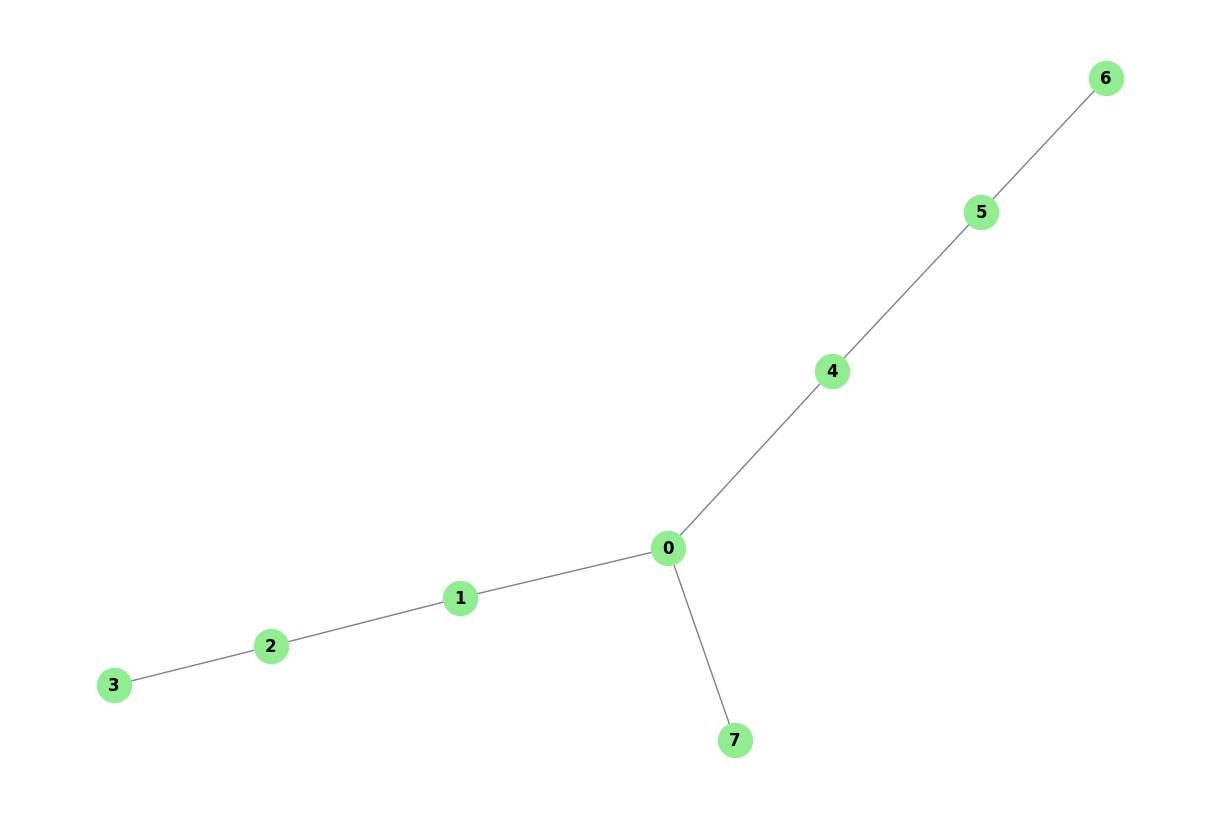

In [9]:
def create_jellyfish_graph_v2(n, num_tentacles=None, max_tentacle_length=None):
    """
    创建水母图 - 版本2

    参数:
    n: 总节点数
    num_tentacles: 触手数量
    max_tentacle_length: 最大触手长度
    """
    G = nx.Graph()

    # 添加中心节点
    G.add_node(0)
    available_nodes = n - 1

    # 设置默认参数
    if num_tentacles is None:
        num_tentacles = min(available_nodes, 4)  # 默认4个触手

    if max_tentacle_length is None:
        max_tentacle_length = available_nodes // 2

    # 分配节点到各个触手
    tentacle_lengths = []
    remaining_nodes = available_nodes

    for i in range(num_tentacles):
        if remaining_nodes <= 0:
            break
        # 为每个触手分配长度，不超过最大长度
        length = min(max_tentacle_length, remaining_nodes)
        tentacle_lengths.append(length)
        remaining_nodes -= length

    # 如果还有剩余节点，分配到现有触手
    while remaining_nodes > 0:
        for i in range(len(tentacle_lengths)):
            if remaining_nodes <= 0:
                break
            tentacle_lengths[i] += 1
            remaining_nodes -= 1

    # 构建图
    current_node = 1
    for length in tentacle_lengths:
        if length > 0:
            # 连接中心节点到触手第一个节点
            G.add_edge(0, current_node)

            # 构建触手链
            for j in range(1, length):
                G.add_edge(current_node + j - 1, current_node + j)

            current_node += length

    return G, tentacle_lengths

# 使用示例
n = 8
G, tentacle_lengths = create_jellyfish_graph_v2(n, num_tentacles=5)

print(f"触手长度分布: {tentacle_lengths}")
print(f"总节点数: {G.number_of_nodes()}")
print(f"中心节点度: {G.degree(0)}")

# 可视化
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen',
        node_size=600, font_size=12, font_weight='bold',
        edge_color='gray')
# plt.title(f'水母图 (n={n}节点, {len(tentacle_lengths)}个触手)')
plt.show()